In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/practice-eda-on-this-sales-dataset/Sales_August_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_May_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_February_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_November_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_January_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_March_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_September_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_April_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_July_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_October_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_June_2019.csv
/kaggle/input/practice-eda-on-this-sales-dataset/Sales_December_2019.csv


In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import seaborn as sns

In [4]:
file_paths = [
    "/kaggle/input/practice-eda-on-this-sales-dataset/Sales_August_2019.csv",
    "/kaggle/input/practice-eda-on-this-sales-dataset/Sales_May_2019.csv",
    "/kaggle/input/practice-eda-on-this-sales-dataset/Sales_February_2019.csv",
    "/kaggle/input/practice-eda-on-this-sales-dataset/Sales_November_2019.csv",
    "/kaggle/input/practice-eda-on-this-sales-dataset/Sales_January_2019.csv",
    "/kaggle/input/practice-eda-on-this-sales-dataset/Sales_March_2019.csv",
    "/kaggle/input/practice-eda-on-this-sales-dataset/Sales_September_2019.csv",
    "/kaggle/input/practice-eda-on-this-sales-dataset/Sales_April_2019.csv",
    "/kaggle/input/practice-eda-on-this-sales-dataset/Sales_July_2019.csv",
    "/kaggle/input/practice-eda-on-this-sales-dataset/Sales_October_2019.csv",
    "/kaggle/input/practice-eda-on-this-sales-dataset/Sales_June_2019.csv",
    "/kaggle/input/practice-eda-on-this-sales-dataset/Sales_December_2019.csv"
]


In [5]:
df=pd.concat([pd.read_csv(file) for file in file_paths])

In [22]:
print("Shape : ",df.shape)

Shape :  (185950, 6)


In [89]:
df.sample(10)

,Order ID,Product,Order Date,Purchase Address,Quantity,Price,Sales,City
6435,147358,Lightning Charging Cable,2019-01-07 16:44:00,"620 Cedar St, Seattle, WA 98101",1,14.95,14.95,Seattle
837,162802,Wired Headphones,2019-03-20 15:29:00,"790 5th St, Los Angeles, CA 90001",1,11.99,11.99,Los Angeles
14228,272938,Apple Airpods Headphones,2019-10-15 17:27:00,"282 Johnson St, Seattle, WA 98101",1,150.00,150.00,Seattle
2620,298160,AA Batteries (4-pack),2019-12-12 13:46:00,"996 7th St, San Francisco, CA 94016",2,3.84,7.68,San Francisco
2348,152745,Bose SoundSport Headphones,2019-02-20 19:16:00,"745 Maple St, San Francisco, CA 94016",1,99.99,99.99,San Francisco
4858,181201,USB-C Charging Cable,2019-04-03 02:44:00,"631 Hill St, Austin, TX 73301",2,11.95,23.90,Austin
10200,160255,Apple Airpods Headphones,2019-02-11 16:01:00,"176 9th St, Austin, TX 73301",1,150.00,150.00,Austin
782,210670,Macbook Pro Laptop,2019-06-26 18:45:00,"276 Meadow St, Portland, OR 97035",1,1700.00,1700.00,Portland
5963,199755,USB-C Charging Cable,2019-05-15 21:41:00,"282 13th St, Boston, MA 02215",1,11.95,11.95,Boston
15378,274032,Wired Headphones,2019-10-05 17:40:00,"273 1st St, Atlanta, GA 30301",1,11.99,11.99,Atlanta


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 25116
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Order Date        185686 non-null  datetime64[ns]
 3   Purchase Address  185686 non-null  object        
 4   Quantity          185686 non-null  int64         
 5   Price             185686 non-null  float64       
 6   Sales             185686 non-null  float64       
 7   City              185686 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 12.8+ MB


## **Missing Values**

<Axes: >

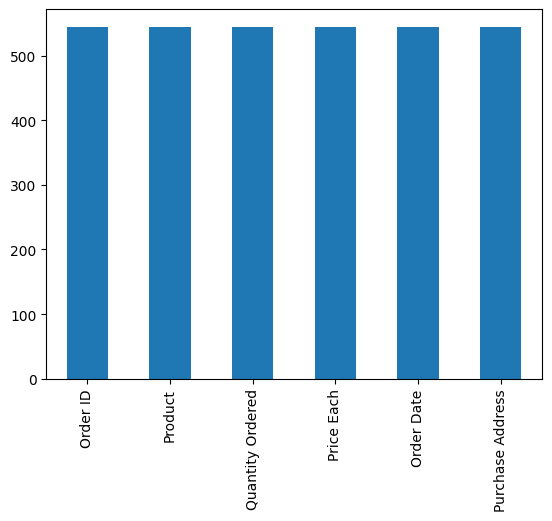

In [9]:
missing=df.isna().sum()
missing=missing[missing>0]
missing.plot(kind='bar')

In [10]:
df=df.dropna()


In [11]:
df = df[df['Quantity Ordered'] != 'Quantity Ordered']

## **Datatype Conversion**

In [12]:
df['Quantity']=pd.to_numeric(df['Quantity Ordered'])
df['Price']=pd.to_numeric(df['Price Each'])
df['Order Date']=pd.to_datetime(df['Order Date'])

In [17]:
df=df.drop("Price Each",axis=1)
df=df.drop("Quantity Ordered",axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Order Date        185686 non-null  datetime64[ns]
 3   Purchase Address  185686 non-null  object        
 4   Quantity          185686 non-null  int64         
 5   Price             185686 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


## **Duplicates**

In [27]:
df.duplicated().sum()

0

In [26]:
df=df.drop_duplicates()

In [29]:
df.describe()

,Order Date,Quantity,Price
count,185686,185686.000000,185686.000000
mean,2019-07-18 21:32:06.298051584,1.124544,184.519255
min,2019-01-01 03:07:00,1.000000,2.990000
25%,2019-04-16 20:55:15,1.000000,11.950000
50%,2019-07-17 20:11:00,1.000000,14.950000
75%,2019-10-26 08:00:00,1.000000,150.000000
max,2020-01-01 05:13:00,9.000000,1700.000000
std,NaN,0.443069,332.843838


## **Price Distribution**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


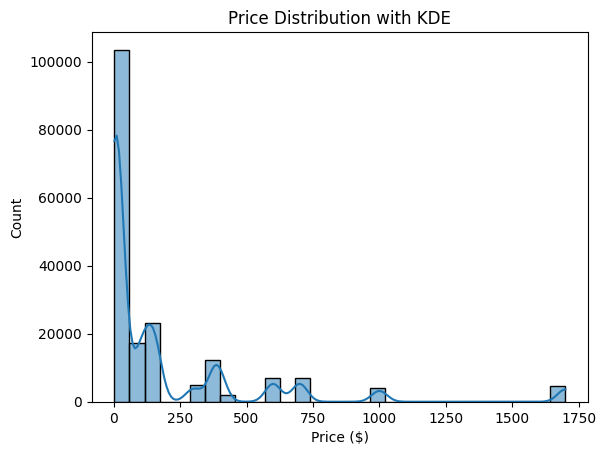

In [87]:
import seaborn as sns

sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution with KDE')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()


## **Popular Product**

<Axes: title={'center': 'Product Order Frequency'}, xlabel='Product', ylabel='Number of Orders'>

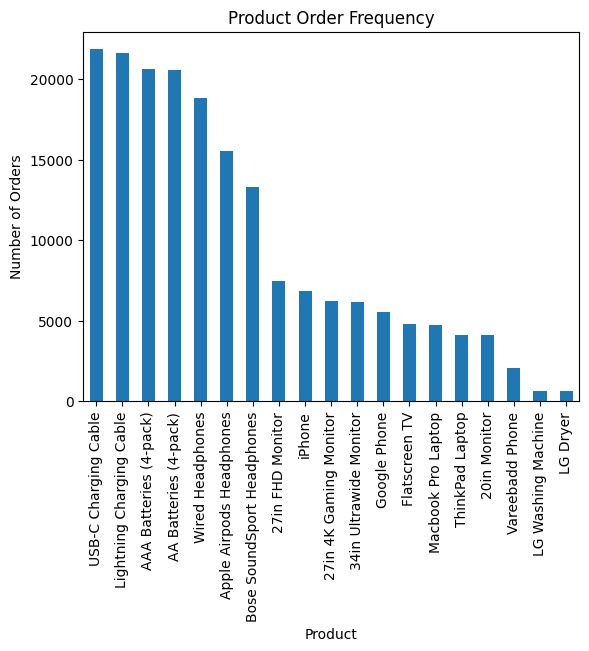

In [36]:
df['Product'].value_counts().plot(kind='bar',title="Product Order Frequency",ylabel="Number of Orders")

## **Product That makes most Revenue**

/tmp/ipykernel_35/1181575450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales']=df['Quantity']* df["Price"]


<Axes: title={'center': 'Revenue Per Product'}, xlabel='Product'>

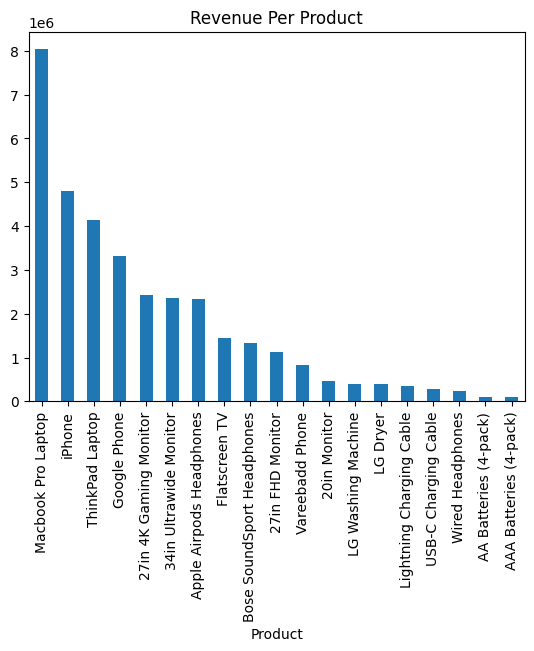

In [40]:
df['Sales']=df['Quantity']* df["Price"]
revenue=df.groupby("Product")["Sales"].sum().sort_values(ascending=False)
revenue.plot(kind='bar',title="Revenue Per Product")

## **Most Orders in a month**

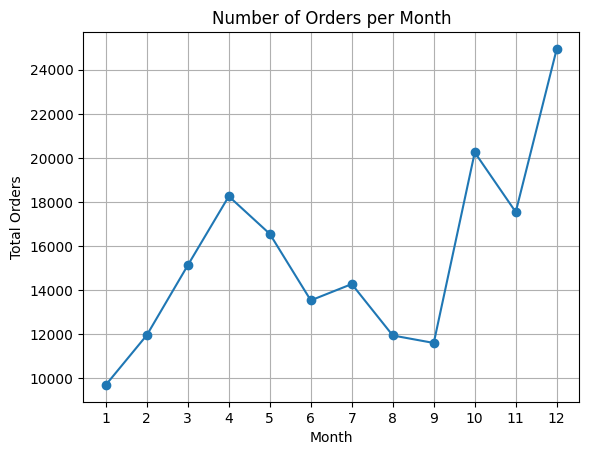

In [86]:
monthly_orders = df.groupby(df['Order Date'].dt.month)['Order ID'].count()
monthly_orders.plot(kind='line', marker='o')
plt.title("Number of Orders per Month")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.xticks(range(1, 13))
plt.grid()
plt.show()


## **Most Orders From Cities**

In [65]:
df["City"]=df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

/tmp/ipykernel_35/1039017113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["City"]=df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())


<Axes: xlabel='City'>

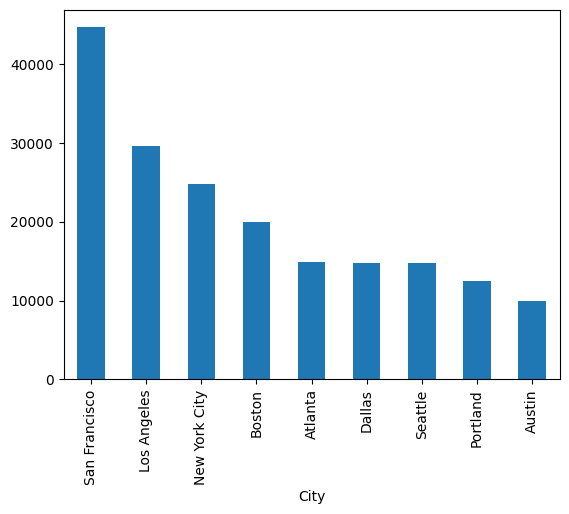

In [82]:
product_by_city=df.groupby("City")["Product"].count().sort_values(ascending=False)
product_by_city.plot(kind="bar")

## **Outliers**

In [91]:
numeric_cols = ['Quantity', 'Price']

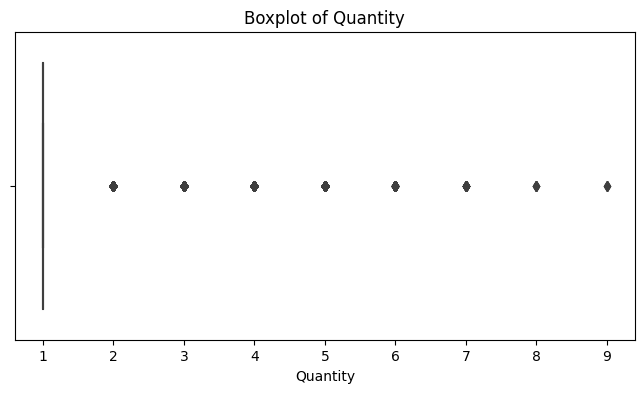

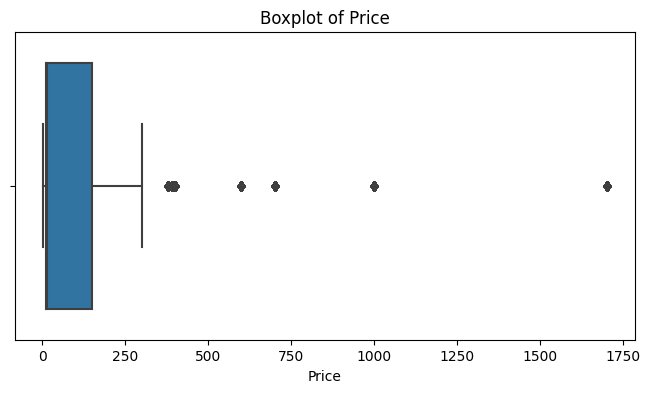

In [93]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [94]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"{col} → Outliers: {len(outliers)}")


Quantity → Outliers: 17395
Price → Outliers: 36985


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


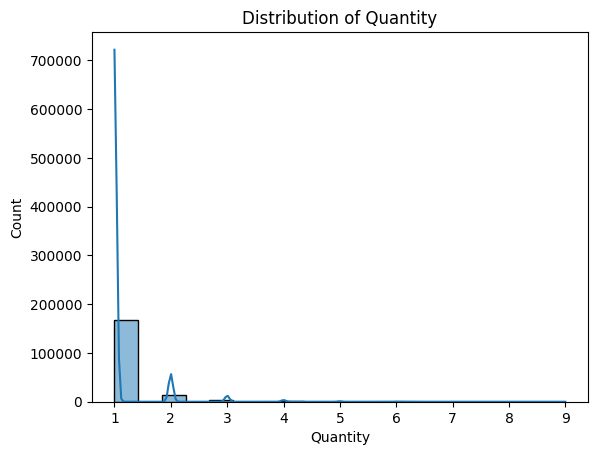

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


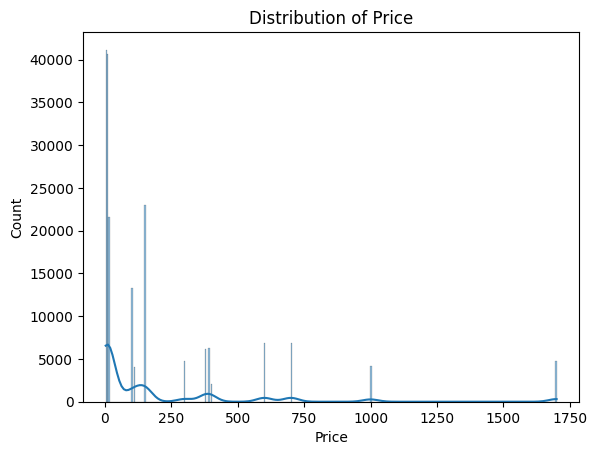

In [95]:
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
